In [1]:
from PIL import Image
import math,random
from studio import Vec, unit_vector, Camera
from assets import AssetLists, Sphere, IntersectionRecord 
from material import Lambertian, Metal, Dielectric, ScatterRecord   


In [2]:
def get_color(ray, scene, depth):
    rec= IntersectionRecord()
    intersect_anything, rec = scene.intersect(ray, 0.001, float('inf'), rec)
    if intersect_anything:
        scatter_record = ScatterRecord()
        
        if depth < 5:
            scatter_flag, scatter_record = rec.mat_ptr.scatter(ray, rec, scatter_record)
            if scatter_flag:
                return scatter_record.attenuation * get_color(scatter_record.specular_ray, scene, depth + 1)
            else:
                return Vec(0, 0, 0)
        else:
            return Vec(0.0, 0.0, 0.0)
    else:
        unit_direction = unit_vector(ray.direction())
        t = 0.5 * (unit_direction.y + 1.0)
        c = (1.0 - t)* Vec(1.0, 1.0, 1.0) + t * Vec(0.5, 0.7, 1.0) # Linear interpolation
        return c

In [3]:
def main():
    # Image dimensions
    nx = 320
    ny = 240
    ar = nx / ny
    ns = 100

    # Create an image
    img = Image.new('RGB', (nx, ny))
    pixels = img.load()

    # Camera setup
    origin = Vec(0.0, 0.0, 0.0)
    lower_left_corner = Vec(-2.0 * (ar / (200/100)), -1.0, -1.0)  # Maintain the center of the image
    horizontal = Vec(4.0 * (ar / (200/100)), 0.0, 0.0)

    vertical = Vec(0.0, 2.0, 0.0)
    cam = Camera(origin, lower_left_corner, horizontal, vertical)

    # scene setup
    scene = AssetLists()

  
# # # Testing extremes in material properties like high reflectivity or refraction
    s1 = Sphere(center=Vec(0, 0, -1), radius=0.5, material=Lambertian(Vec(0.8, 0.5, 0.5)))
    s2 = Sphere(center=Vec(0, -100.5, -1), radius=100, material=Dielectric(Vec(1.0,1.0,1.0), 3))
    s3 = Sphere(center=Vec(1, 0, -1), radius=0.25, material=Metal(Vec(1.0, 1.0, 1.0), 0))
    s4 = Sphere(center=Vec(-1, 0, -1), radius=0.25, material=Metal(Vec(0.2, 0.2, 0.2), 1))
    s5 = Sphere(center=Vec(0.8, 0.9, -1.5), radius=0.25, material=Dielectric(Vec(1.3,1.3,1.3), 3))


    scene.add(s1)
    scene.add(s2)
    scene.add(s3)
    scene.add(s4)
    scene.add(s5)

    # Rendering loop
    for j in range(ny-1, -1, -1):
        for i in range(nx):
            col = Vec(0, 0, 0)
            for s in range(ns):
                u = (i + random.uniform(0,10)/ float(10)) / nx
                v = (j + random.uniform(0,10)/ float(10)) / ny
                ray = cam.get_ray_at_point(u, v)
                c= get_color(ray, scene, 0)
                #print("color before: ", c)
                col += c
                #print("color after: ", col)

            col /= ns
            col = Vec(math.sqrt(col[0]), math.sqrt(col[1]), math.sqrt(col[2])) 
            #print("color after sampling: ", col)
            r = int(255 * col.r)
            g = int(255 * col.g)
            b = int(255 * col.b)
            #return
            
            pixels[i, ny - j - 1] = (r, g, b)

    # Save the image
    display(img)

Rendering in progress...


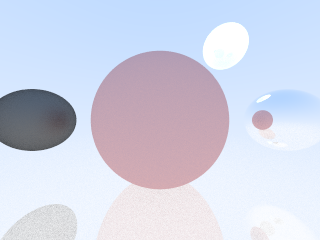

In [4]:
if __name__ == "__main__":
    print("Rendering in progress...")
    main()